In [1]:
# 7-0, 7-3, 7-7, 7-19, 7-29, 7-41

import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from flatsurf import *
import numpy as np
from matplotlib import pyplot as plt
import os
import pwlf
import os
from surface_dynamics.all import *
from Library import *
from Library import Section
import math
from time import time
import copy
from scipy import integrate

import sympy as sym
from sympy import Symbol
from sympy import solve, lambdify

In [2]:
#Code from Sunrose 
#Gives non-visibility tori for testing
D = OrigamiDatabase()
q = D.query()
qlist = q.list()

def unit_hor_saddle(O):
    count = 0
    for vert in O.vertices():
        tup = vert.up_right_tuple()
        for i in tup:
            for vert2 in O.vertices():
                tup2 = vert2.up_right_tuple()
                if O.r()(i) in tup2:
                    return True
    return False

def is_unobstructed(O):
    cusp_reps = O.teichmueller_curve().cusp_representatives()
    for item in cusp_reps:
        if not unit_hor_saddle(item[0]):
            return False
    return True

def obstructed(n, **kwargs):
    obstructed = []
    count_obstructed = 0
    p = D.query(nb_squares=n, **kwargs)
    for item in p:
        if not is_unobstructed(item):
            obstructed.append(item)
            count_obstructed+= item.teichmueller_curve().orbit_graph().num_verts()
    return (obstructed, count_obstructed)

In [3]:
# list of permutations
def perms_list(n, **kwargs):
    obstructed = []
    p = D.query(nb_squares=n, **kwargs)
    for item in p:
        if not is_unobstructed(item):
            obstructed.append(item)
            for perm in item.teichmueller_curve():
                obstructed.append(perm)
    return obstructed

In [4]:
permutations = perms_list(7)
perm = permutations[0]
perm

(1)(2)(3)(4)(5)(6,7)
(1,2,3,4,5,6)(7)

In [36]:
from surface_dynamics.all import Origami

# Define the horizontal and vertical permutations
horizontal = '(1,2)(3)'  # Identity except for 6 <-> 7
vertical = '(1,3)(2)'  # Cyclic on 1-6, fixed 7

horizontal = '(1)(2)(3)(4)(5)(6,7)'  # Identity except for 6 <-> 7
vertical = '(1,2,3,4,5,6)(7)'  # Cyclic on 1-6, fixed 7

# Create the Origami object
s = Origami(horizontal, vertical)

# Print details about the surface
c = square_tiled_surface.cylinder_diagram()
separatrix_diagram = c.separatrix_diagram()

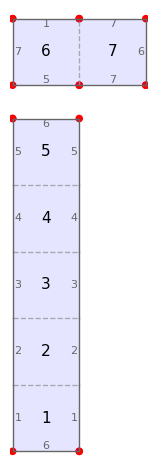

In [37]:
s.show()

In [38]:
separatrix_diagram

(0)-(0)

In [44]:
v = s.veech_group()
cusps = v.cusps()
for cu
v.cusp_data(cusp[5])

(
[ 10   3]      
[-27  -8], 3, 1
)

In [45]:
generators = []
a = s.veech_group().cusps()
for item in a:
    m = s.veech_group().cusp_data(item)[0]
    generators.append(m.matrix())

In [46]:
generators

[
[1 2]  [-344  225]  [-10359   4900]  [-271  128]  [ 1  0]  [ 10   3]
[0 1], [-529  346], [-21904  10361], [-578  273], [-6  1], [-27  -8],

[-59  40]  [-23  12]  [-6  7]  [-1196   567]
[-90  61], [-48  25], [-7  8], [-2527  1198]
]

In [47]:
eigs = []
for matrix in generators:
    eig1, eig2 = matrix.eigenvalues()
    if eig1 == eig2:
        if eig1 == 1:
            eigs.append(eig1)
        else:
            raise ValueError("Eigenvalue not equal to 1")
    else:
        raise ValueError("Different eigenvalues")
# find the eigenvectors for each generator
eigenvecs = []
for matrix in generators:
    vec = matrix.eigenvectors_right()[0][1][0]
    vec = np.array([[vec[0]], [vec[1]]])
    eigenvecs.append(vec)

In [52]:
for gen, vec in zip(generators, eigenvecs):
    print(f"generator: \n{gen}\n eigenvector: \n{vec}\n\n")

generator: 
[1 2]
[0 1]
 eigenvector: 
[[1]
 [0]]


generator: 
[-344  225]
[-529  346]
 eigenvector: 
[[1.        ]
 [1.53333333]]


generator: 
[-10359   4900]
[-21904  10361]
 eigenvector: 
[[1.        ]
 [2.11428571]]


generator: 
[-271  128]
[-578  273]
 eigenvector: 
[[1.   ]
 [2.125]]


generator: 
[ 1  0]
[-6  1]
 eigenvector: 
[[0]
 [1]]


generator: 
[ 10   3]
[-27  -8]
 eigenvector: 
[[ 1]
 [-3]]


generator: 
[-59  40]
[-90  61]
 eigenvector: 
[[1. ]
 [1.5]]


generator: 
[-23  12]
[-48  25]
 eigenvector: 
[[1]
 [2]]


generator: 
[-6  7]
[-7  8]
 eigenvector: 
[[1]
 [1]]


generator: 
[-1196   567]
[-2527  1198]
 eigenvector: 
[[1.        ]
 [2.11111111]]


